In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [84]:
# Read in the data.
agg = pd.read_csv("../data/3_23_agg.csv")

# Create arrays.
inc_pred_perc = agg.loc[agg["actual"] == 1, ["pred_perc"]].to_numpy().flatten()
dec_pred_perc = agg.loc[agg["actual"] == 0, ["pred_perc"]].to_numpy().flatten()

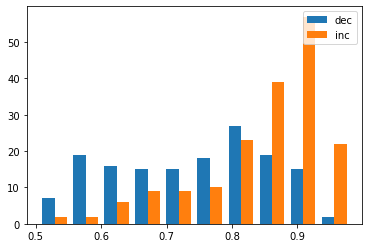

In [85]:
# Create a histogram with two distributions.
plt.hist([dec_pred_perc, inc_pred_perc], label=["dec", "inc"])
plt.legend(loc="upper right")
plt.show()

In [87]:
cutoffs = np.arange(.45, .95, .05)

# Loop.
for cutoff in cutoffs:
    agg["majority_pred"] = agg["pred_perc"].apply(lambda x: 1 if x > cutoff else 0)
    agg["diff"] = agg["majority_pred"] - agg["actual"]
    accuracy = agg.loc[agg["diff"] == 0, :].shape[0] / agg.shape[0]
    agg.drop(columns=["diff"], inplace=True)
    print(f"{round(cutoff, 2):.2f}, acc: {round(accuracy, 4)}")


0.45, acc: 0.5392
0.50, acc: 0.5392
0.55, acc: 0.5482
0.60, acc: 0.6024
0.65, acc: 0.6386
0.70, acc: 0.6596
0.75, acc: 0.6717
0.80, acc: 0.6958
0.85, acc: 0.6988
0.90, acc: 0.5843


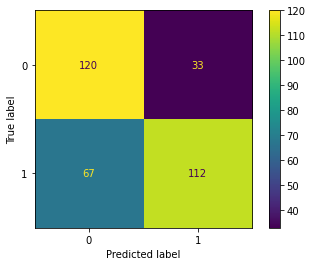

In [88]:
# Create actual DataFrame with predictions.
agg["majority_pred"] = agg["pred_perc"].apply(lambda x: 1 if x > .85 else 0)

# Confusion matrix.
cm = confusion_matrix(agg["actual"], agg["majority_pred"])
ConfusionMatrixDisplay(cm).plot()